# Starterkit for the Spamfilter Project


In [1]:
import pandas as pd
import plotly.express as px
from tidypython import gather, spread
from dplython import select, sift, mutate, summarize, group_by, X, head, DplyFrame, tail
from plotly import io, offline # io to save a html-file of the animation
offline.init_notebook_mode() # offline for better looking interactive graphics

In [2]:
# read the data file
spam_pandas = pd.read_excel('Spam.xlsx')
spam_pandas.head(3)

C:\Program Files (x86)\Python38-32\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.



make  address   all  num3d   our  over  remove  internet  order  mail  ...  \
0  0.21     0.28  0.50    0.0  0.14  0.28    0.21      0.07   0.00  0.94  ...   
1  0.06     0.00  0.71    0.0  1.23  0.19    0.19      0.12   0.64  0.25  ...   
2  0.00     0.00  0.00    0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   

   charSemicolon  charRoundbracket  charSquarebracket  charExclamation  \
0           0.00             0.132                0.0            0.372   
1           0.01             0.143                0.0            0.276   
2           0.00             0.137                0.0            0.137   

   charDollar  charHash  capitalAve  capitalLong  capitalTotal  type  
0       0.180     0.048       5.114          101          1028  spam  
1       0.184     0.010       9.821          485          2259  spam  
2       0.000     0.000       3.537           40           191  spam  

[3 rows x 58 columns]

In [3]:
spam_pandas.describe() # attention - describe leaves out information about the variable type (strings)!

make      address          all        num3d          our  \
count  2900.000000  2900.000000  2900.000000  2900.000000  2900.000000   
mean      0.115155     0.206879     0.298783     0.102703     0.353441   
std       0.313290     1.203179     0.503013     1.756188     0.702831   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.050000     0.000000     0.470000     0.000000     0.470000   
max       4.540000    14.280000     5.100000    42.810000     9.090000   

              over       remove     internet        order         mail  ...  \
count  2900.000000  2900.000000  2900.000000  2900.000000  2900.000000  ...   
mean      0.113890     0.140352     0.125907     0.102517     0.267362  ...   
std       0.306619     0.419819     0.447998     0.282156     0.628225  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.270000  ...   
max       5.880000     7.270000    11.110000     2.590000    11.110000  ...   

        conference  charSemicolon  charRoundbracket  charSquarebracket  \
count  2900.000000    2900.000000       2900.000000        2900.000000   
mean      0.029431       0.035097          0.134358           0.015644   
std       0.265470       0.223255          0.276620           0.102551   
min       0.000000       0.000000          0.000000           0.000000   
25%       0.000000       0.000000          0.000000           0.000000   
50%       0.000000       0.000000          0.065500           0.000000   
75%       0.000000       0.000000          0.183000           0.000000   
max       8.330000       4.367000          9.752000           4.081000   

       charExclamation   charDollar     charHash   capitalAve  capitalLong  \
count      2900.000000  2900.000000  2900.000000  2900.000000  2900.000000   
mean          0.313373     0.096577     0.049345     5.625692    61.816552   
std           0.861483     0.288902     0.503712    31.759113   231.770588   
min           0.000000     0.000000     0.000000     1.000000     1.000000   
25%           0.000000     0.000000     0.000000     1.677000     7.000000   
50%           0.062500     0.000000     0.000000     2.454500    17.000000   
75%           0.394000     0.107000     0.000000     4.064500    51.000000   
max          32.478000     6.003000    19.829000  1102.500000  9989.000000   

       capitalTotal  
count    2900.00000  
mean      320.61069  
std       677.54688  
min         1.00000  
25%        41.00000  
50%       111.50000  
75%       305.00000  
max     15841.00000  

[8 rows x 57 columns]

In [4]:
spam_pandas.shape

(2900, 58)

In [5]:
# We'd like to figure out the ratio of spam to ham mail. 
print(spam_pandas.groupby('type').count()) # either we use pandas

# or we use dplython, it's your choice - we get the same information both ways. 
spam_dply = DplyFrame(spam_pandas)
spam_dply >> group_by(X.type) >> summarize(numbers = X.type.count())

print(type(spam_pandas))
print(type(spam_dply))

         make  address   all  num3d   our  over  remove  internet  order  \
type                                                                       
nonspam  1450     1450  1450   1450  1450  1450    1450      1450   1450   
spam     1450     1450  1450   1450  1450  1450    1450      1450   1450   

         mail  ...  conference  charSemicolon  charRoundbracket  \
type           ...                                                
nonspam  1450  ...        1450           1450              1450   
spam     1450  ...        1450           1450              1450   

         charSquarebracket  charExclamation  charDollar  charHash  capitalAve  \
type                                                                            
nonspam               1450             1450        1450      1450        1450   
spam                  1450             1450        1450      1450        1450   

         capitalLong  capitalTotal  
type                                
nonspam         1450       

# Divide the data in test and training sets

Rule of thumb is to use 70 - 80% of the data to train the algorithms and the rest for testing. But the choice strongly depends on the amount of available data, the type of data and the question you are trying to answer.  

We need ensure that the sample sizes are the same as in the original data set otherwise we distort the train and test data sets. 

In [6]:
train_set = spam_dply.sample(frac=0.8,random_state = 123) #random state is a seed value, we'll come back to that
test_set  = spam_dply.drop(train_set.index)

In [7]:
print(train_set.shape)
print(test_set.shape)

(2320, 58)
(580, 58)


In [8]:
# check number of observations in each category 

print(train_set >> group_by(X.type) >> summarize(numbers = X.type.count()))

print(test_set >> group_by(X.type) >> summarize(numbers = X.type.count()))

      type  numbers
0  nonspam     1161
1     spam     1159
      type  numbers
0  nonspam      289
1     spam      291


In [9]:
# check distribution of each category in all three data sets

print(spam_dply >> group_by(X.type) >> summarize(distribution = X.type.count()/spam_dply.shape[0]))

print(train_set >> group_by(X.type) >> summarize(distribution = X.type.count()/train_set.shape[0]))

print(test_set >> group_by(X.type) >> summarize(distribution = X.type.count()/test_set.shape[0]))

      type  distribution
0  nonspam           0.5
1     spam           0.5
      type  distribution
0  nonspam      0.500431
1     spam      0.499569
      type  distribution
0  nonspam      0.498276
1     spam      0.501724


# Simple histograms to explore the data

In [10]:
fig = px.histogram(train_set, x = "make", facet_col = "type", log_y = True)
fig.show()

In [11]:
fig = px.histogram(train_set, x = "money", facet_col = "type", log_y = True)
fig.show()

In [12]:
# you can also choose another visualisation like the following or anything else you prefer
fig = px.histogram(train_set, x="money", y="type", color="type", marginal="rug", 
             log_y = True, barmode="group", range_x=[-0.1, 5], nbins = 100, template = "none")

# change the position of the legend incase you need to save space
fig.update_layout(legend_orientation='v', legend=dict(x=0.8, y=0.58))

fig.show()

Ex 1

In [13]:
# E: has at least 3% exclamation marks"
# S: Spam mail"
# p(E/S) : p_E_S = p(E and S)/p(S)
# p(E/S^c) : p_E_Sc
# p(S/E) : p_S_E

N_Total = train_set.shape[0]
print(N_Total)

# you can use pandas like this to subset the data and then count it 
N_E_Spam = train_set.type[(train_set.charExclamation >= 3) & (train_set.type == 'spam')].count()
print(N_E_Spam)
N_Spam = train_set.type[(train_set.type == 'spam')].count()
print(N_Spam)

# p_E_S
print(N_E_Spam/N_Spam)






# p_E_Sc with numpy:
N_E_SpamC = train_set.type[(train_set.charExclamation >= 3) & (train_set.type != 'spam')].count()
N_SpamC = train_set.type[(train_set.type != 'spam')].count()
print(N_E_SpamC / N_SpamC)

2320
18
1159
0.015530629853321829
0.002583979328165375


In [14]:
# p(E|S^c) = p_E_Sc = p(E and S^c)/p(S^c)

N_E_SpamC  = train_set >> sift((X.charExclamation >= 3) & (X.type != 'spam')) >> summarize(n = X.type.count())
N_SpamC = train_set >> sift((X.type != 'spam')) >> summarize(n = X.type.count())
p_E_Sc = N_E_SpamC.n[0]/N_SpamC.n[0]




# p(S | E) = p_S_E = p(S and E) / p(E)
set_E = train_set >> sift(X.charExclamation >= 3)
set_S_and_E = set_E >> sift(X.type == 'spam')

N_E = (set_E >> summarize(n = X.type.count())).n[0]
N_S_and_E = (set_S_and_E >> summarize(n = X.type.count())).n[0]
N_total = (train_set >> summarize(n = X.type.count())).n[0]

p_S_and_E = N_S_and_E / N_total
p_E = N_E / N_total
p_S_E = p_S_and_E / p_E
is_spam = p_S_E >= 0.98

print("N_E: ", N_E)
print("N_S_and_E: ", N_S_and_E)
print("N_total: ", N_total)
print("p_S_and_E: ", p_S_and_E)
print("p_S_E: ", p_S_E)
print("is_spam: ", is_spam)

N_E:  21
N_S_and_E:  18
N_total:  2320
p_S_and_E:  0.007758620689655172
p_S_E:  0.8571428571428571
is_spam:  False


Ex 2

In [17]:
def vary_exclamation_thres(thres):
    train_set['prediction'] = "pred_ham"
    train_set.loc[train_set['charExclamation'] >= thres, 'prediction'] = "pred_spam"

    return evaluate_filter(train_set, False)

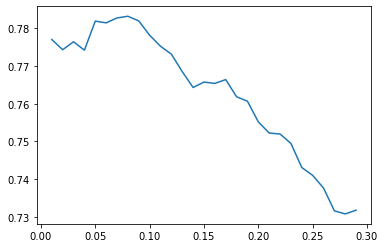

In [18]:
import matplotlib.pyplot as plt 

thresholds = [x / 100.0 for x in range(1, 30, 1)]
qualities = []

for threshold in thresholds:
    qualities.append(vary_exclamation_thres(threshold))

plt.plot(thresholds, qualities)

In [19]:
def test_on_test_data(test_set, thres):
    test_set['prediction'] = "pred_ham"
    test_set.loc[test_set['charExclamation'] >= thres, 'prediction'] = "pred_spam"

    evaluate_filter(test_set, True)
    
    
test_on_test_data(test_set, 0.08)

type        nonspam  spam
prediction               
pred_ham        226    64
pred_spam        63   227

TP:  227
FP:  63
FN:  64
TN:  226

accuracy     = 0.781 (bad)
sensitivity  = 0.780 (bad)
specificity  = 0.782 (bad)
pos_predictive_value = 0.783 (bad)
neg_predictive_value = 0.779 (bad)
quality:     = 0.781 (bad)


In [24]:
def p_c_spam(word, thres):
    # p(S | E) = p_S_E = p(S and E) / p(E)
    set_E = train_set >> sift(X[word] >= thres)
    set_S_and_E = set_E >> sift(X.type == 'spam')

    N_E = (set_E >> summarize(n = X.type.count())).n[0]
    N_S_and_E = (set_S_and_E >> summarize(n = X.type.count())).n[0]
    N_total = (train_set >> summarize(n = X.type.count())).n[0]

    p_S_and_E = N_S_and_E / N_total
    p_E = N_E / N_total
    p_S_E = p_S_and_E / p_E
    
    return p_S_E

def p_c_ham(word, thres):
    # p(Sc | E) = p_Sc_E = p(Sc and E) / p(E)
    set_E = train_set >> sift(X[word] >= thres)
    set_Sc_and_E = set_E >> sift(X.type != 'spam')

    N_E = (set_E >> summarize(n = X.type.count())).n[0]
    N_Sc_and_E = (set_Sc_and_E >> summarize(n = X.type.count())).n[0]
    N_total = (train_set >> summarize(n = X.type.count())).n[0]

    p_Sc_and_E = N_Sc_and_E / N_total
    p_E = N_E / N_total
    p_Sc_E = p_Sc_and_E / p_E
    
    return p_Sc_E

# towardsdatascience approach

In [951]:
%reset -f

### imports

In [952]:
import pandas as pd
import numpy as np

### param definitions

In [953]:
alpha = 1
P_spam_base = 0.5

data_excel = "Spam.xlsx"

### basic initialisation

In [954]:
P_ham_base = 1 - P_spam_base

non_word = "charSemicolon"

### read data from Excel sheet

In [955]:
all_data = pd.read_excel(data_excel)

C:\Program Files (x86)\Python38-32\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.



### replace nonspam with ham (for consistency)

In [956]:
is_ham = all_data["type"] == "nonspam"
all_data.loc[is_ham, "type"] = "ham"

### get list of words

In [957]:
column_names = list(all_data.columns)
index_of_first_non_word = column_names.index(non_word)
words = column_names[0:3]#index_of_first_non_word]

### sort into training and test data

In [958]:
train_data = all_data.sample(frac=0.8,random_state = 123)
test_data  = all_data.drop(train_data.index)

 ### reduce frequency to binary indicator

In [959]:
def classify_as_often(data, optimal_thres):
    word_appears_often_data = data.copy()
    for word, thres in zip(data.columns, optimal_thres):
        word_appears_often_data[word] = False
        word_appears_often_data.loc[data[word] >= thres, word] = True
    return word_appears_often_data

### get occurrence in spam and ham

In [960]:
def calc_P_wi(word_appears_often_data, labelling, spam_or_ham):
    only_relevant_lines = word_appears_often_data.loc[labelling == spam_or_ham, :]
    
    
    nr_of_relevant_total_words = np.sum(only_relevant_lines.apply(pd.value_counts).loc[True]) # ugly
    #print("nr_of_relevant", nr_of_relevant_total_words)
    
    #print("type: ", spam_or_ham, "relevant total_words: ", nr_of_relevant_total_words)

    P_wi = dict()
    for word in word_appears_often_data.columns:
        nr_of_relevant_lines_with_this_word = np.sum(only_relevant_lines[word] == True)
        rel_occ = nr_of_relevant_lines_with_this_word / nr_of_relevant_total_words
        P_wi[word] = rel_occ
    return P_wi

In [961]:
def classify(row, P_wi_spam, P_wi_ham):
    #print("new_msg")
    p_spam_given_message = P_spam_base
    p_ham_given_message = P_ham_base

    word_appears = row.values.tolist()

    appearing_words = [word for word, appears in zip(words, word_appears) if appears]

    for word in appearing_words:
        p_spam_given_message *= P_wi_spam[word]
        p_ham_given_message *= P_wi_ham[word]
    #print(p_spam_given_message)
    #print(p_ham_given_message)
    if (p_spam_given_message > p_ham_given_message):
        #print("it is spam!")
        return "pred_spam"
    else:
        #print("it is ham!")
        return "pred_ham"

### evaluation

In [962]:
import operator
def evaluate(var_name, inp, relate, cut):
    ops = {">": operator.gt,
           "<": operator.lt}
    if ops[relate](inp, cut):
        quality = "\x1b[32mgood\x1b[0m"
    else:
        quality = "\x1b[31mbad\x1b[0m" #"bad"
    print(var_name + " " * max((12 - len(var_name)), 0) + " = " + "{:3.3f}".format(inp) + " (" + quality + ")")

In [963]:
def evaluate_classifier(real_type, predicted_type, give_output):
    confusion_mat = pd.crosstab(predicted_type, real_type, margins=False)

    if confusion_mat.shape[0] == 2 and confusion_mat.shape[1] == 2:
        if give_output:
            print(confusion_mat)
            print()
        
        TP = confusion_mat.loc['pred_spam', 'spam']
        FP = confusion_mat.loc['pred_spam', 'ham']
        FN = confusion_mat.loc['pred_ham', 'spam']
        TN = confusion_mat.loc['pred_ham', 'ham']

        if give_output:
            print("TP: ", TP)
            print("FP: ", FP)
            print("FN: ", FN)
            print("TN: ", TN)
            print()

        accuracy = (TP + TN) / (TP + FP + TN + FN)
        sensitivity = (TP) / (TP + FN)
        specificity = (TN) / (TN + FP)
        pos_predictive_value = (TP) / (TP + FP)
        neg_predictive_value = (TN) / (TN + FN)
        quality = (accuracy * sensitivity * specificity * pos_predictive_value * neg_predictive_value) ** (1/5)

        if give_output:
            evaluate("accuracy", accuracy, ">", 0.9)
            evaluate("sensitivity", sensitivity, ">", 0.9)
            evaluate("specificity", specificity, ">", 0.9)
            evaluate("pos_predictive_value", pos_predictive_value, ">", 0.9)
            evaluate("neg_predictive_value", neg_predictive_value, ">", 0.9)
            evaluate("quality: ", quality, ">", 0.9)
        return quality
    else:
        if give_output:
            print("no confusion matrix!")
            #print(predicted_type)
        return 0

### find optimal thresholds

In [964]:
def vary_word_thres(real_type, rel_occurences, thres):
    prediction = rel_occurences.copy() #ugly
    
    prediction.loc[rel_occurences >= -100000000] = "pred_ham" #ugly hack
    prediction.loc[rel_occurences >= thres] = "pred_spam"
    quality_big_is_spam = evaluate_classifier(real_type, prediction, False)
    
    prediction.loc[rel_occurences >= -100000000] = "pred_spam" #ugly hack
    prediction.loc[rel_occurences >= thres] = "pred_ham"
    quality_big_is_ham = evaluate_classifier(real_type, prediction, False)
    
    return max(quality_big_is_spam, quality_big_is_ham)

In [965]:
def find_optimum(real_type, rel_occurences):
    thresholds = [x / 100.0 for x in range(1, 200, 1)]
    qualities = []

    for threshold in thresholds:
        qualities.append(vary_word_thres(real_type, rel_occurences, threshold))

    best_threshold = thresholds[qualities.index(max(qualities))]
    return best_threshold

In [966]:
def find_optimal_thres(real_type, rel_occurencies_all_words):
    optimal_thres = []
    for word in words:
        rel_occurencies = rel_occurencies_all_words.loc[:, word]
        optimal_thres.append(find_optimum(real_type, rel_occurencies))

    return optimal_thres;

### execution

In [967]:
def classify_and_rate(data, model_params):
    word_frequency_data = data.loc[:, words]
    labelling = data.loc[:, "type"]
    
    if model_params == None:
        model_params = dict()
        model_params["optimal_thres"] = find_optimal_thres(labelling, word_frequency_data)
        word_appears_often_data = classify_as_often(word_frequency_data, model_params["optimal_thres"])
        model_params["P_wi_spam"] = calc_P_wi(word_appears_often_data, labelling, "spam")
        model_params["P_wi_ham"] = calc_P_wi(word_appears_often_data, labelling, "ham")
        #print(model_params["P_wi_spam"])
        #print(model_params["P_wi_ham"])
    else:
        word_appears_often_data = classify_as_often(word_frequency_data, model_params["optimal_thres"])
        
    prediction = word_appears_often_data.apply(classify, axis=1, P_wi_spam=model_params["P_wi_spam"], P_wi_ham=model_params["P_wi_ham"])

    evaluate_classifier(labelling, prediction, True);
    return model_params

In [968]:
#train on train data
    #use thres_optimisation
    #use classify
    #use rate
model_params = classify_and_rate(train_data, None)

type        ham  spam
row_0                
pred_ham   1057   783
pred_spam   104   376

TP:  376
FP:  104
FN:  783
TN:  1057

accuracy     = 0.618 (bad)
sensitivity  = 0.324 (bad)
specificity  = 0.910 (good)
pos_predictive_value = 0.783 (bad)
neg_predictive_value = 0.574 (bad)
quality:     = 0.607 (bad)


In [969]:
#test on test data
    #use classify
    #use rate
classify_and_rate(test_data, model_params);

type       ham  spam
row_0               
pred_ham   260   193
pred_spam   29    98

TP:  98
FP:  29
FN:  193
TN:  260

accuracy     = 0.617 (bad)
sensitivity  = 0.337 (bad)
specificity  = 0.900 (bad)
pos_predictive_value = 0.772 (bad)
neg_predictive_value = 0.574 (bad)
quality:     = 0.608 (bad)
